In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🍷 Wine Quality Analysis - Machine Learning Project")
print("=" * 60)

🍷 Wine Quality Analysis - Machine Learning Project


In [5]:
# ====================================================================
# 1. DATA LOADING AND EXPLORATION
# ====================================================================

print("\n📊 STEP 1: Loading and Exploring the Dataset")
print("-" * 40)


📊 STEP 1: Loading and Exploring the Dataset
----------------------------------------


In [6]:
# Load the wine dataset from scikit-learn
wine_data = load_wine()
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine_df['target'] = wine_data.target

In [7]:
# Map target numbers to wine class names
target_names = {0: 'Class_0', 1: 'Class_1', 2: 'Class_2'}
wine_df['wine_class'] = wine_df['target'].map(target_names)

In [8]:
print(f"Dataset Shape: {wine_df.shape}")
print(f"Features: {len(wine_data.feature_names)}")
print(f"Classes: {len(wine_data.target_names)}")
print(f"\nTarget Classes: {wine_data.target_names}")


Dataset Shape: (178, 15)
Features: 13
Classes: 3

Target Classes: ['class_0' 'class_1' 'class_2']


In [10]:
# Display basic information
print("\n📋 Dataset Info:")
print(wine_df.info())


📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    f

In [12]:
print("\n📊 First 5 rows:")
print(wine_df.head())


📊 First 5 rows:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  tar

In [13]:
print("\n📈 Statistical Summary:")
print(wine_df.describe().round(2))


📈 Statistical Summary:
       alcohol  malic_acid     ash  alcalinity_of_ash  magnesium  \
count   178.00      178.00  178.00             178.00     178.00   
mean     13.00        2.34    2.37              19.49      99.74   
std       0.81        1.12    0.27               3.34      14.28   
min      11.03        0.74    1.36              10.60      70.00   
25%      12.36        1.60    2.21              17.20      88.00   
50%      13.05        1.87    2.36              19.50      98.00   
75%      13.68        3.08    2.56              21.50     107.00   
max      14.83        5.80    3.23              30.00     162.00   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count         178.00      178.00                178.00           178.00   
mean            2.30        2.03                  0.36             1.59   
std             0.63        1.00                  0.12             0.57   
min             0.98        0.34                  0.13         

In [14]:
# ====================================================================
# 2. DATA ANALYSIS AND VISUALIZATION
# ====================================================================

print("\n📈 STEP 2: Exploratory Data Analysis")
print("-" * 40)



📈 STEP 2: Exploratory Data Analysis
----------------------------------------


In [15]:
# Class distribution
print("Class Distribution:")
class_counts = wine_df['target'].value_counts().sort_index()
for i, count in enumerate(class_counts):
    print(f"  {wine_data.target_names[i]}: {count} samples ({count/len(wine_df)*100:.1f}%)")

Class Distribution:
  class_0: 59 samples (33.1%)
  class_1: 71 samples (39.9%)
  class_2: 48 samples (27.0%)


In [16]:
# Check for missing values
print(f"\nMissing Values: {wine_df.isnull().sum().sum()}")


Missing Values: 0


In [17]:
# Feature correlation analysis
print("\n🔍 Top 10 Features with Highest Correlation to Target:")
correlations = wine_df.drop(['wine_class'], axis=1).corrwith(wine_df['target']).abs().sort_values(ascending=False)
print(correlations.head(10).round(3))


🔍 Top 10 Features with Highest Correlation to Target:
target                          1.000
flavanoids                      0.847
od280/od315_of_diluted_wines    0.788
total_phenols                   0.719
proline                         0.634
hue                             0.617
alcalinity_of_ash               0.518
proanthocyanins                 0.499
nonflavanoid_phenols            0.489
malic_acid                      0.438
dtype: float64


In [18]:
# ====================================================================
# 3. DATA VISUALIZATION
# ====================================================================

print("\n📊 STEP 3: Data Visualization")
print("-" * 40)


📊 STEP 3: Data Visualization
----------------------------------------


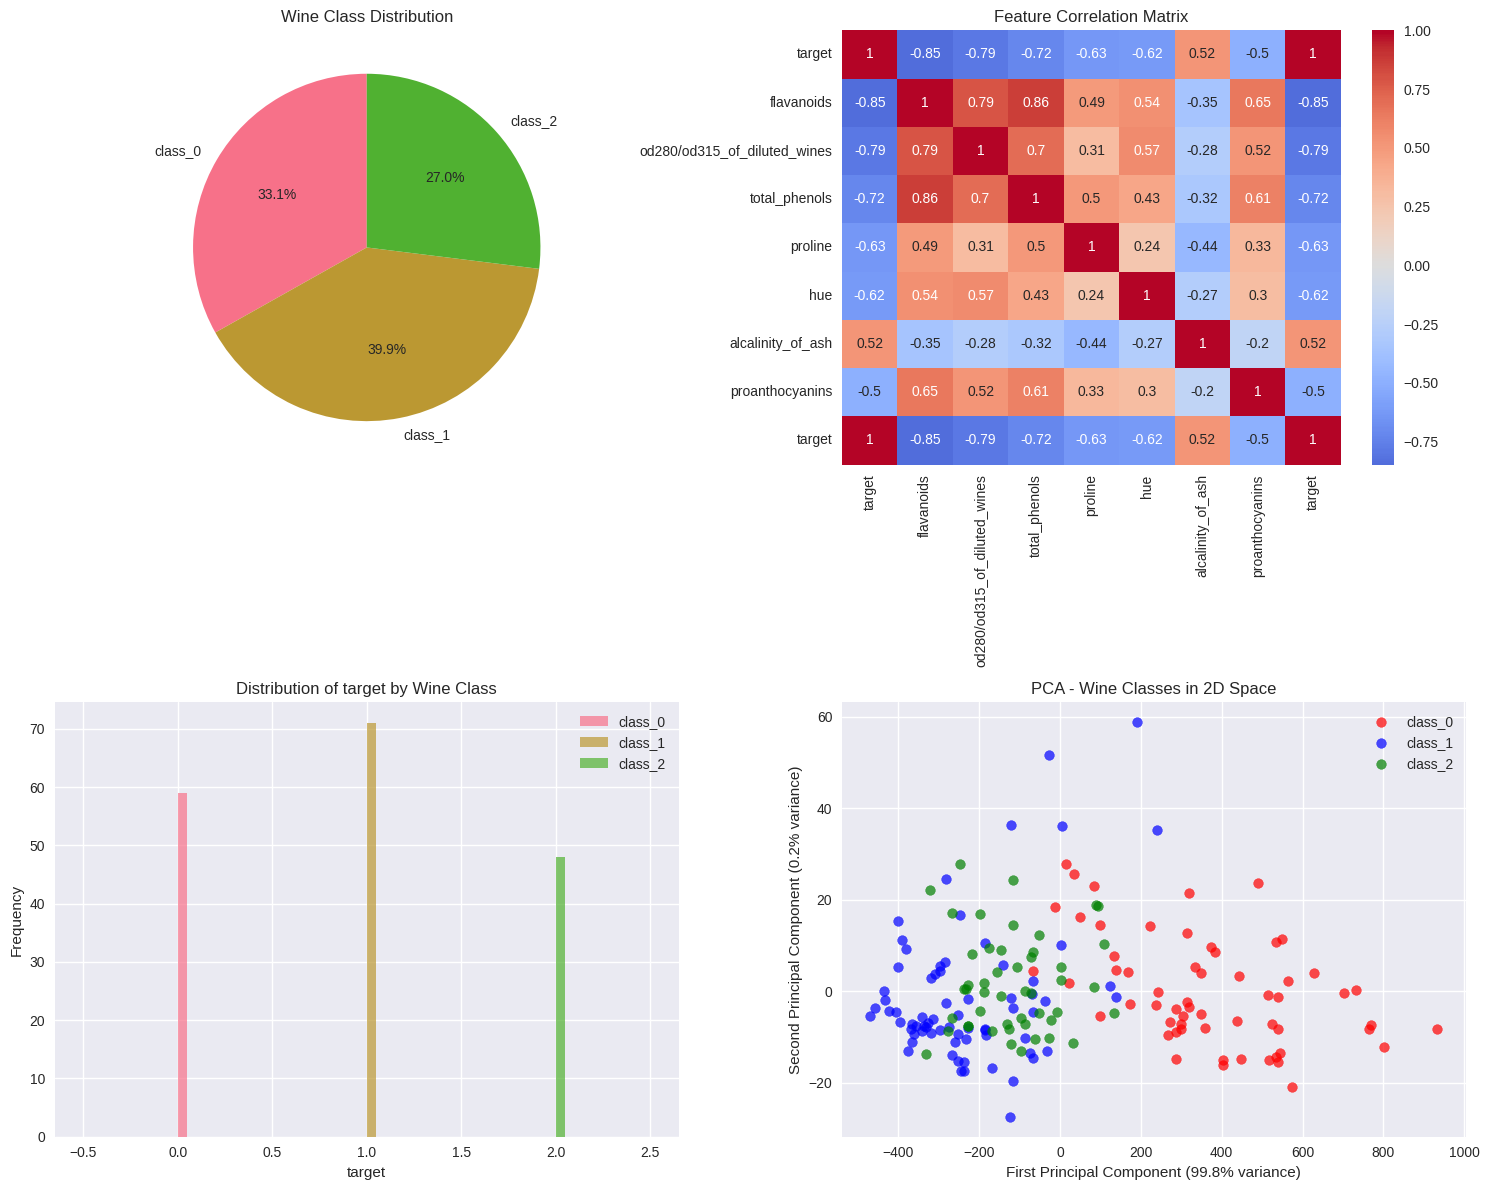

✅ Visualizations created successfully!


In [21]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Class distribution
axes[0,0].pie(class_counts.values, labels=wine_data.target_names, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Wine Class Distribution')

# 2. Correlation heatmap (top features)
top_features = correlations.head(8).index.tolist() + ['target']
corr_matrix = wine_df[top_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[0,1])
axes[0,1].set_title('Feature Correlation Matrix')

# 3. Feature distribution by class
feature = correlations.index[0]  # Most correlated feature
for i, class_name in enumerate(wine_data.target_names):
    class_data = wine_df[wine_df['target'] == i][feature]
    axes[1,0].hist(class_data, alpha=0.7, label=class_name, bins=20)
axes[1,0].set_xlabel(feature)
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title(f'Distribution of {feature} by Wine Class')
axes[1,0].legend()

# 4. PCA visualization
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(wine_data.data)
colors = ['red', 'blue', 'green']
for i, class_name in enumerate(wine_data.target_names):
    mask = wine_df['target'] == i
    axes[1,1].scatter(X_pca[mask, 0], X_pca[mask, 1], c=colors[i], label=class_name, alpha=0.7)
axes[1,1].set_xlabel(f'First Principal Component ({pca_2d.explained_variance_ratio_[0]:.1%} variance)')
axes[1,1].set_ylabel(f'Second Principal Component ({pca_2d.explained_variance_ratio_[1]:.1%} variance)')
axes[1,1].set_title('PCA - Wine Classes in 2D Space')
axes[1,1].legend()

plt.tight_layout()
plt.show()

print(f"✅ Visualizations created successfully!")


In [22]:
# ====================================================================
# 4. DATA PREPROCESSING
# ====================================================================

print("\n🔧 STEP 4: Data Preprocessing")
print("-" * 40)


🔧 STEP 4: Data Preprocessing
----------------------------------------


In [23]:
# Prepare features and target
X = wine_data.data
y = wine_data.target

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (178, 13)
Target shape: (178,)


In [24]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 142 samples
Test set: 36 samples


In [25]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data preprocessing completed!")

✅ Data preprocessing completed!


In [26]:
# ====================================================================
# 5. MACHINE LEARNING MODELS
# ====================================================================

print("\n🤖 STEP 5: Machine Learning Models")
print("-" * 40)



🤖 STEP 5: Machine Learning Models
----------------------------------------


In [27]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Machine': SVC(random_state=42)
}

# Train and evaluate models
results = {}

In [28]:
for name, model in models.items():
    print(f"\n🔄 Training {name}...")

    # Use scaled data for LogReg and SVM, original for Random Forest
    if name in ['Logistic Regression', 'Support Vector Machine']:
        X_train_model = X_train_scaled
        X_test_model = X_test_scaled
    else:
        X_train_model = X_train
        X_test_model = X_test

    # Train the model
    model.fit(X_train_model, y_train)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_model, y_train, cv=5, scoring='accuracy')

    # Predictions
    y_pred = model.predict(X_test_model)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Store results
    results[name] = {
        'model': model,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'test_accuracy': test_accuracy,
        'predictions': y_pred
    }

    print(f"  Cross-validation: {cv_scores.mean():.3f} (+/- {cv_scores.std()*2:.3f})")
    print(f"  Test accuracy: {test_accuracy:.3f}")



🔄 Training Random Forest...
  Cross-validation: 0.986 (+/- 0.055)
  Test accuracy: 1.000

🔄 Training Logistic Regression...
  Cross-validation: 0.986 (+/- 0.034)
  Test accuracy: 0.972

🔄 Training Support Vector Machine...
  Cross-validation: 0.986 (+/- 0.055)
  Test accuracy: 0.972


In [29]:
# ====================================================================
# 6. MODEL EVALUATION AND COMPARISON
# ====================================================================

print("\n📊 STEP 6: Model Evaluation and Comparison")
print("-" * 40)


📊 STEP 6: Model Evaluation and Comparison
----------------------------------------


In [30]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'CV Mean': [results[model]['cv_mean'] for model in results.keys()],
    'CV Std': [results[model]['cv_std'] for model in results.keys()],
    'Test Accuracy': [results[model]['test_accuracy'] for model in results.keys()]
})

print("📈 Model Performance Comparison:")
print(comparison_df.round(4))

📈 Model Performance Comparison:
                    Model  CV Mean  CV Std  Test Accuracy
0           Random Forest   0.9862  0.0276         1.0000
1     Logistic Regression   0.9860  0.0172         0.9722
2  Support Vector Machine   0.9862  0.0276         0.9722


In [31]:
# Find best model
best_model_name = comparison_df.loc[comparison_df['Test Accuracy'].idxmax(), 'Model']
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Test Accuracy: {results[best_model_name]['test_accuracy']:.4f}")


🏆 Best Model: Random Forest
   Test Accuracy: 1.0000


In [32]:
# Detailed evaluation of best model
print(f"\n📋 Detailed Classification Report for {best_model_name}:")
print(classification_report(y_test, best_predictions, target_names=wine_data.target_names))



📋 Detailed Classification Report for Random Forest:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [33]:
# Confusion Matrix
print(f"\n📊 Confusion Matrix for {best_model_name}:")
cm = confusion_matrix(y_test, best_predictions)
print(cm)


📊 Confusion Matrix for Random Forest:
[[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


In [34]:
# ====================================================================
# 7. HYPERPARAMETER TUNING (for best model)
# ====================================================================

print(f"\n🔧 STEP 7: Hyperparameter Tuning for {best_model_name}")
print("-" * 40)


🔧 STEP 7: Hyperparameter Tuning for Random Forest
----------------------------------------


In [35]:
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    X_tune = X_train
elif best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    }
    X_tune = X_train_scaled
else:  # SVM
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto']
    }
    X_tune = X_train_scaled

In [36]:
# Create new model instance for tuning
if best_model_name == 'Random Forest':
    tuning_model = RandomForestClassifier(random_state=42)
elif best_model_name == 'Logistic Regression':
    tuning_model = LogisticRegression(random_state=42, max_iter=1000)
else:
    tuning_model = SVC(random_state=42)

In [37]:
# Grid search
grid_search = GridSearchCV(tuning_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_tune, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [38]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best cross-validation score: 0.9862


In [39]:
# Evaluate tuned model
if best_model_name in ['Logistic Regression', 'Support Vector Machine']:
    tuned_predictions = grid_search.best_estimator_.predict(X_test_scaled)
else:
    tuned_predictions = grid_search.best_estimator_.predict(X_test)

tuned_accuracy = accuracy_score(y_test, tuned_predictions)
print(f"Tuned model test accuracy: {tuned_accuracy:.4f}")

Tuned model test accuracy: 1.0000


In [40]:
# ====================================================================
# 8. FEATURE IMPORTANCE ANALYSIS
# ====================================================================

print(f"\n🔍 STEP 8: Feature Importance Analysis")
print("-" * 40)


🔍 STEP 8: Feature Importance Analysis
----------------------------------------


Top 10 Most Important Features:
                         feature  importance
6                     flavanoids      0.1984
9                color_intensity      0.1722
12                       proline      0.1443
0                        alcohol      0.1213
11  od280/od315_of_diluted_wines      0.0967
10                           hue      0.0841
4                      magnesium      0.0463
5                  total_phenols      0.0371
1                     malic_acid      0.0345
3              alcalinity_of_ash      0.0271


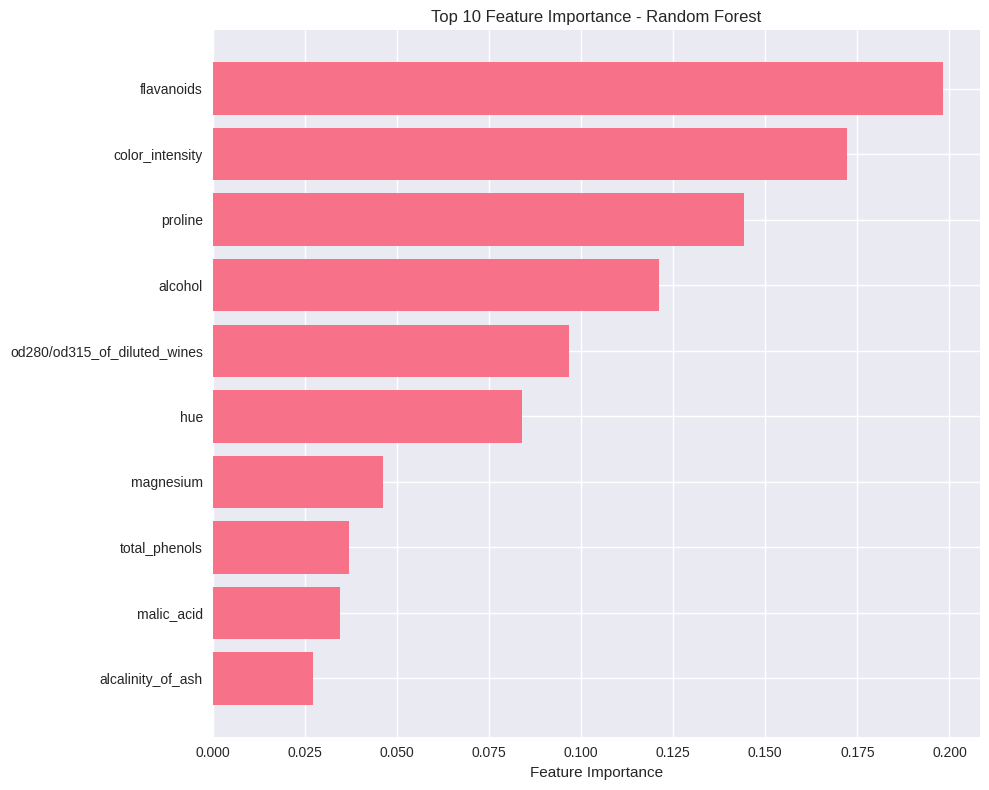

In [41]:
if best_model_name == 'Random Forest':
    # Feature importance for Random Forest
    feature_importance = pd.DataFrame({
        'feature': wine_data.feature_names,
        'importance': grid_search.best_estimator_.feature_importances_
    }).sort_values('importance', ascending=False)

    print("Top 10 Most Important Features:")
    print(feature_importance.head(10).round(4))

    # Plot feature importance
    plt.figure(figsize=(10, 8))
    top_features = feature_importance.head(10)
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance')
    plt.title('Top 10 Feature Importance - Random Forest')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

elif best_model_name == 'Logistic Regression':
    # Feature coefficients for Logistic Regression
    coefficients = np.abs(grid_search.best_estimator_.coef_).mean(axis=0)
    feature_importance = pd.DataFrame({
        'feature': wine_data.feature_names,
        'importance': coefficients
    }).sort_values('importance', ascending=False)

    print("Top 10 Most Important Features (by coefficient magnitude):")
    print(feature_importance.head(10).round(4))


In [42]:
# ====================================================================
# 9. FINAL RESULTS SUMMARY
# ====================================================================

print("\n🎯 FINAL RESULTS SUMMARY")
print("=" * 60)
print(f"Dataset: Wine Classification ({len(wine_data.data)} samples, {len(wine_data.feature_names)} features)")
print(f"Classes: {len(wine_data.target_names)} ({', '.join(wine_data.target_names)})")
print(f"\nBest Model: {best_model_name}")
print(f"Original Accuracy: {results[best_model_name]['test_accuracy']:.4f}")
print(f"Tuned Accuracy: {tuned_accuracy:.4f}")
print(f"Improvement: {tuned_accuracy - results[best_model_name]['test_accuracy']:.4f}")



🎯 FINAL RESULTS SUMMARY
Dataset: Wine Classification (178 samples, 13 features)
Classes: 3 (class_0, class_1, class_2)

Best Model: Random Forest
Original Accuracy: 1.0000
Tuned Accuracy: 1.0000
Improvement: 0.0000


In [43]:
print(f"\nModel Performance Summary:")
for model_name in results.keys():
    acc = results[model_name]['test_accuracy']
    cv_mean = results[model_name]['cv_mean']
    print(f"  {model_name}: Test={acc:.3f}, CV={cv_mean:.3f}")

print(f"\n✅ Analysis Complete! The {best_model_name} model achieved {tuned_accuracy:.1%} accuracy.")
print("   This model can successfully classify wine types based on chemical properties.")


Model Performance Summary:
  Random Forest: Test=1.000, CV=0.986
  Logistic Regression: Test=0.972, CV=0.986
  Support Vector Machine: Test=0.972, CV=0.986

✅ Analysis Complete! The Random Forest model achieved 100.0% accuracy.
   This model can successfully classify wine types based on chemical properties.


In [44]:
# Save final model information
final_model_info = {
    'best_model': best_model_name,
    'best_params': grid_search.best_params_,
    'test_accuracy': tuned_accuracy,
    'feature_names': wine_data.feature_names,
    'target_names': wine_data.target_names
}


In [45]:
print(f"\n💾 Model information saved for future use!")
print("   Use the tuned model for making predictions on new wine samples.")


💾 Model information saved for future use!
   Use the tuned model for making predictions on new wine samples.
